In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Running max of MNIST(batchnorm=False, dropout=False)
max_conv_layers = 3

max_dense_layers = 2 # including final softmax layer

max_conv_kernels = 64

max_dense_nodes = 1024

num_generations = 10

population_size = 10

num_epochs = 3

In [3]:
datafile = "Sat Oct 28 20:48:00 2017.csv"
data = np.genfromtxt(datafile, delimiter=",")
num_generations = 10
population_size = 10
data = data[1:]
accuracy = []
for row in data:
    accuracy.append(row[-1])
running_max = scipy.maximum.accumulate(accuracy)
accuracy = np.array(accuracy)
#current_max = 0

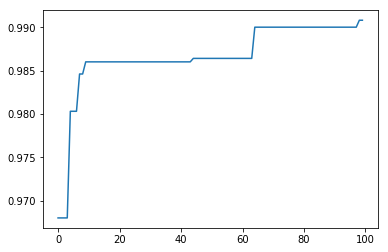

In [4]:
plt.figure(1)
plt.plot(range(len(running_max)), running_max)
plt.show()

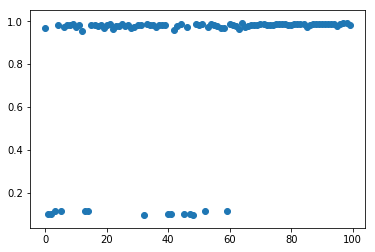

In [5]:
plt.figure(2)
plt.scatter(range(len(accuracy)), accuracy)
plt.show()

In [6]:
conv3den2=[]
conv3den1=[]
conv2den2=[]
conv2den1=[]
conv1den2=[]
conv1den1=[]

gen = 1
pop = 0
for row in data:
    pop += 1
    if pop > population_size:
        gen += 1
        pop = 1
    if row[0] + row[6] + row[12] == 3:
        if row[18] == 1:
            conv3den2.append((gen,row[-1]))
        else:
            conv3den1.append((gen,row[-1]))
    elif row[0] + row[6] + row[12] == 2:
        if row[18] == 1:
            conv2den2.append((gen,row[-1]))
        else:
            conv2den1.append((gen,row[-1]))
    else:
        if row[18] == 1:
            conv1den2.append((gen,row[-1]))
        else:
            conv1den1.append((gen,row[-1]))
print(len(conv3den2))
print(len(conv3den1))
print(len(conv2den2))
print(len(conv2den1))
print(len(conv1den2))
print(len(conv1den1))

19
44
26
7
1
3


## Scatter plot of accuracy over generations

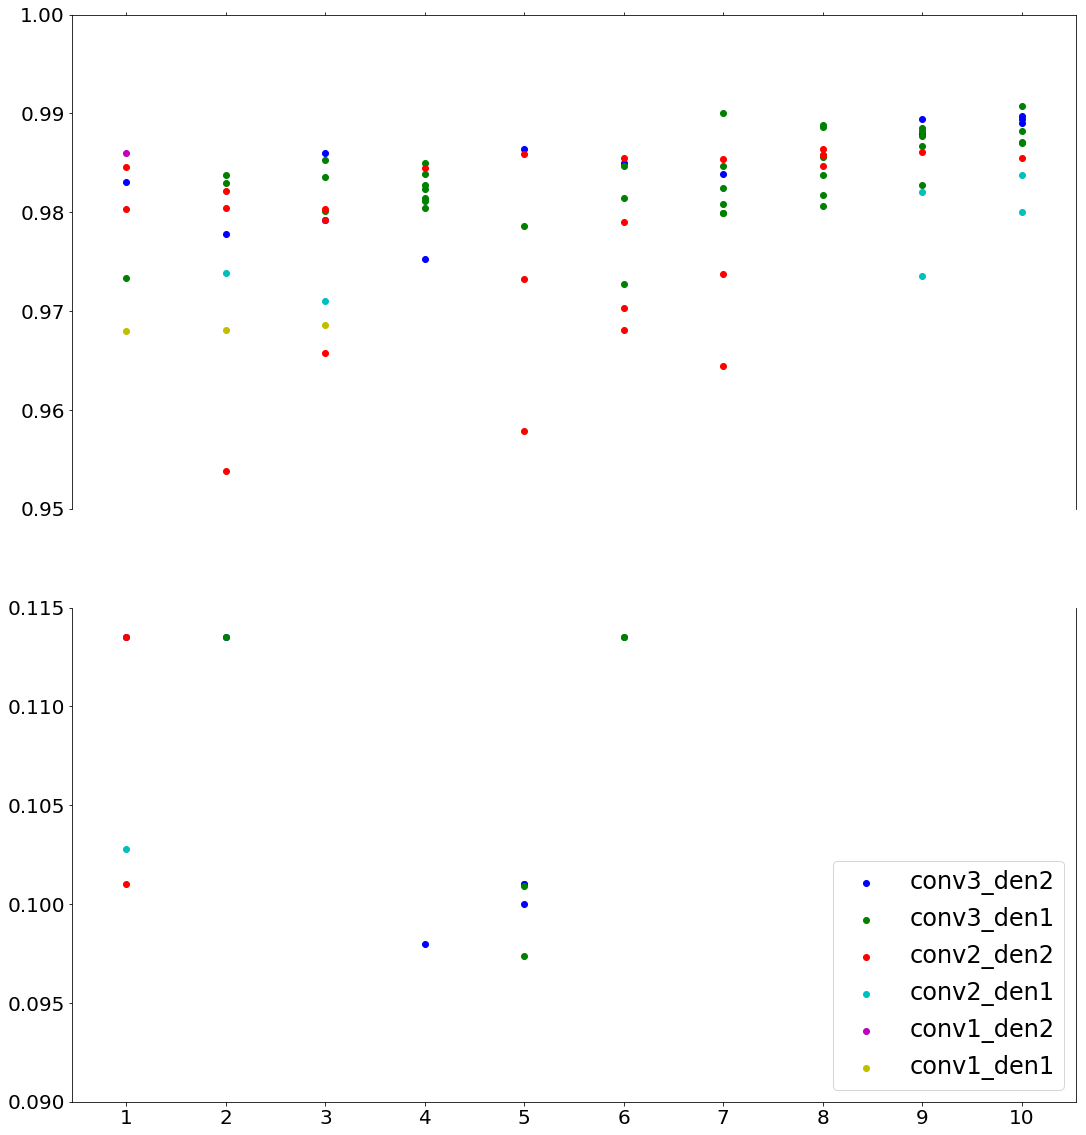

In [7]:
plt.figure(3)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
x1,y1 = zip(*conv3den2)
x2,y2 = zip(*conv3den1)
x3,y3 = zip(*conv2den2)
x4,y4 = zip(*conv2den1)
x5,y5 = zip(*conv1den2)
x6,y6 = zip(*conv1den1)



f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(x1,y1,color=colors[0])
ax.scatter(x2,y2,color=colors[1])
ax.scatter(x3,y3,color=colors[2])
ax.scatter(x4,y4,color=colors[3])
ax.scatter(x5,y5,color=colors[4])
ax.scatter(x6,y6,color=colors[5])

conv3_den2 = ax2.scatter(x1,y1,color=colors[0])
conv3_den1 = ax2.scatter(x2,y2,color=colors[1])
conv2_den2 = ax2.scatter(x3,y3,color=colors[2])
conv2_den1 = ax2.scatter(x4,y4,color=colors[3])
conv1_den2 = ax2.scatter(x5,y5,color=colors[4])
conv1_den1 = ax2.scatter(x6,y6,color=colors[5])

ax.set_ylim(.95, 1.)  # outliers only
ax2.set_ylim(0.09, .115)  # most of the data

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

ax2.legend((conv3_den2, conv3_den1, conv2_den2, conv2_den1, conv1_den2, conv1_den1),
           ('conv3_den2', 'conv3_den1', 'conv2_den2', 'conv2_den1', 'conv1_den2', 'conv1_den1'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=24)

ax.tick_params(labelsize=20)
ax2.tick_params(labelsize=20)

start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(1, num_generations+1, 1))

fig = plt.gcf()
fig.set_size_inches(18, 20)
plt.show()

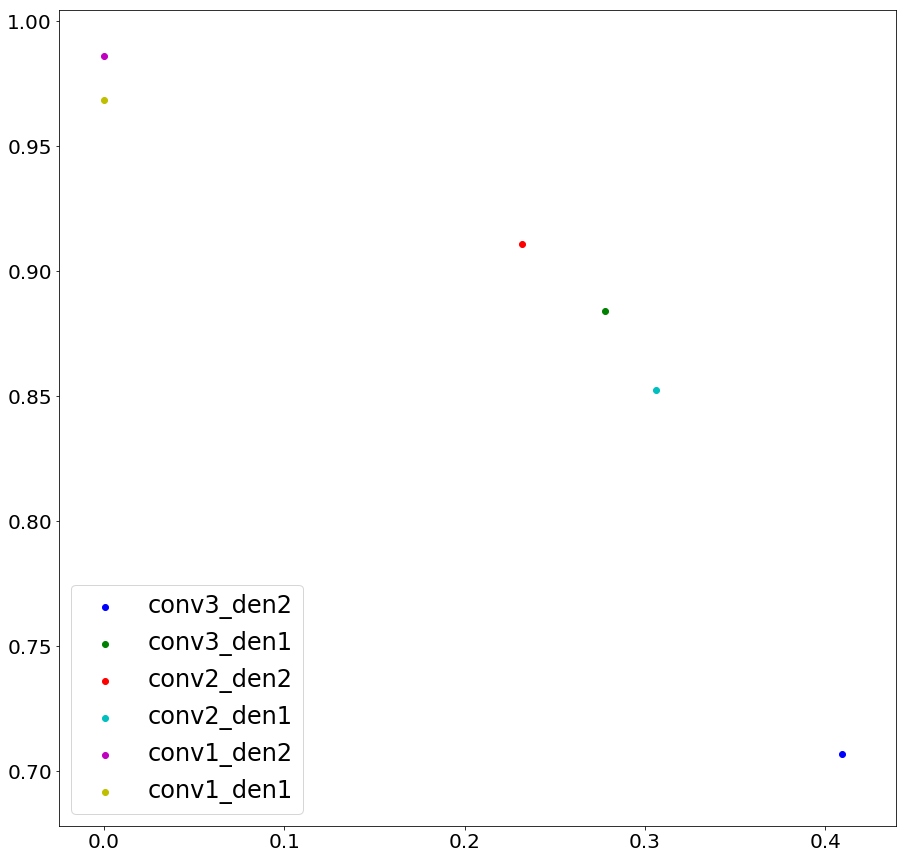

In [13]:
plt.figure(5)

conv3den2_avg = np.mean(y1)
conv3den2_std = np.std(y1)
conv3den1_avg = np.mean(y2)
conv3den1_std = np.std(y2)
conv2den2_avg = np.mean(y3)
conv2den2_std = np.std(y3)
conv2den1_avg = np.mean(y4)
conv2den1_std = np.std(y4)
conv1den2_avg = np.mean(y5)
conv1den2_std = np.std(y5)
conv1den1_avg = np.mean(y6)
conv1den1_std = np.std(y6)

plt.scatter(conv3den2_std,conv3den2_avg,color=colors[0])
plt.scatter(conv3den1_std,conv3den1_avg,color=colors[1])
plt.scatter(conv2den2_std,conv2den2_avg,color=colors[2])
plt.scatter(conv2den1_std,conv2den1_avg,color=colors[3])
plt.scatter(conv1den2_std,conv1den2_avg,color=colors[4])
plt.scatter(conv1den1_std,conv1den1_avg,color=colors[5])

plt.legend(('conv3_den2', 'conv3_den1', 'conv2_den2', 'conv2_den1', 'conv1_den2', 'conv1_den1'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=24)

plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()